In [1]:
import sys

sys.path.append("../..")
from src.data_loaders.data_paths import get_data_root
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.models.helpers import split_data
from src.models.models import XGBoostModel
from src.data_loaders.datasets import Datasets

In [2]:
df = pd.read_csv(get_data_root() / "evaluation_full.csv")

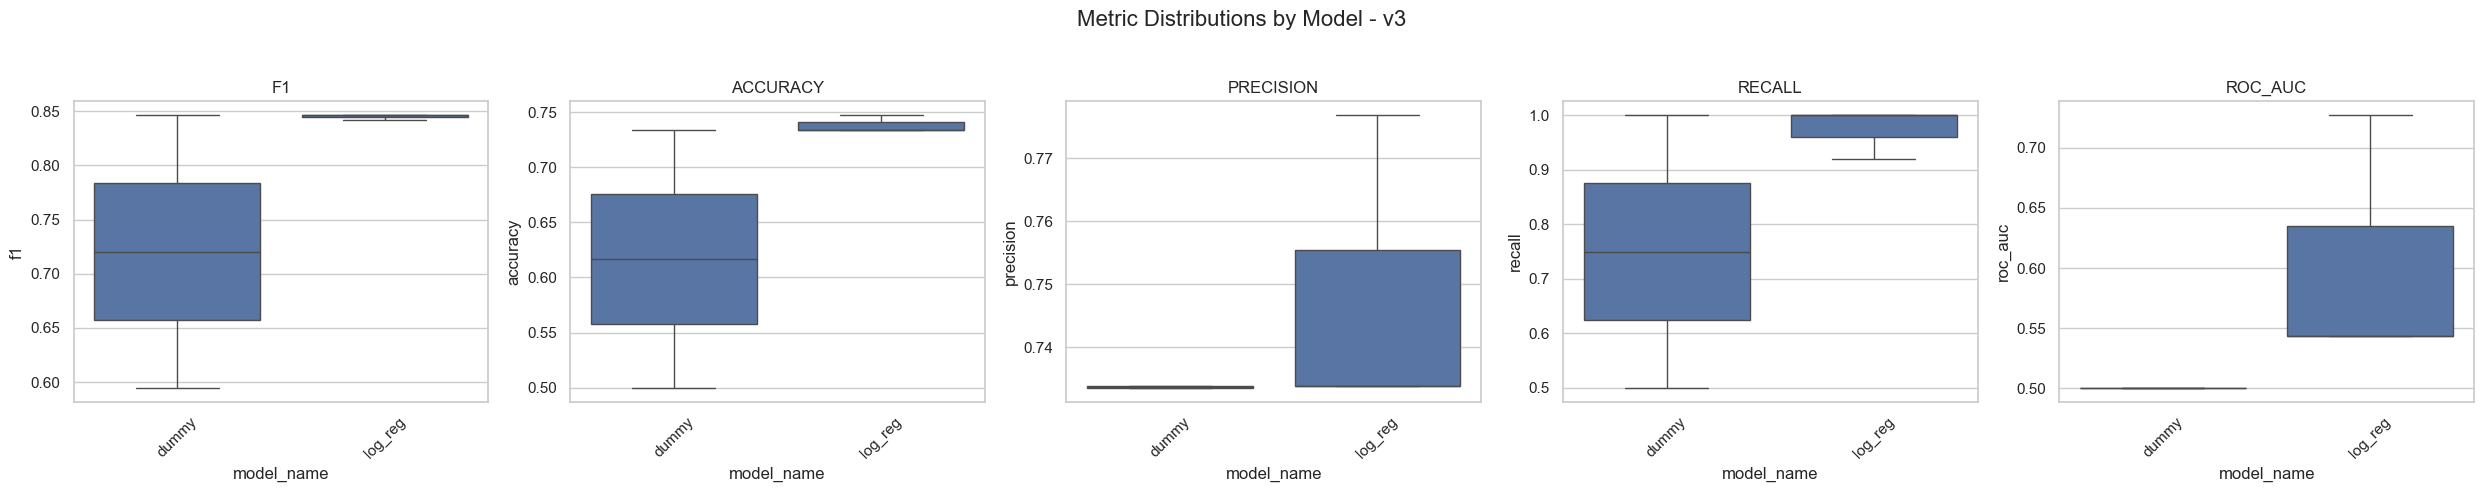

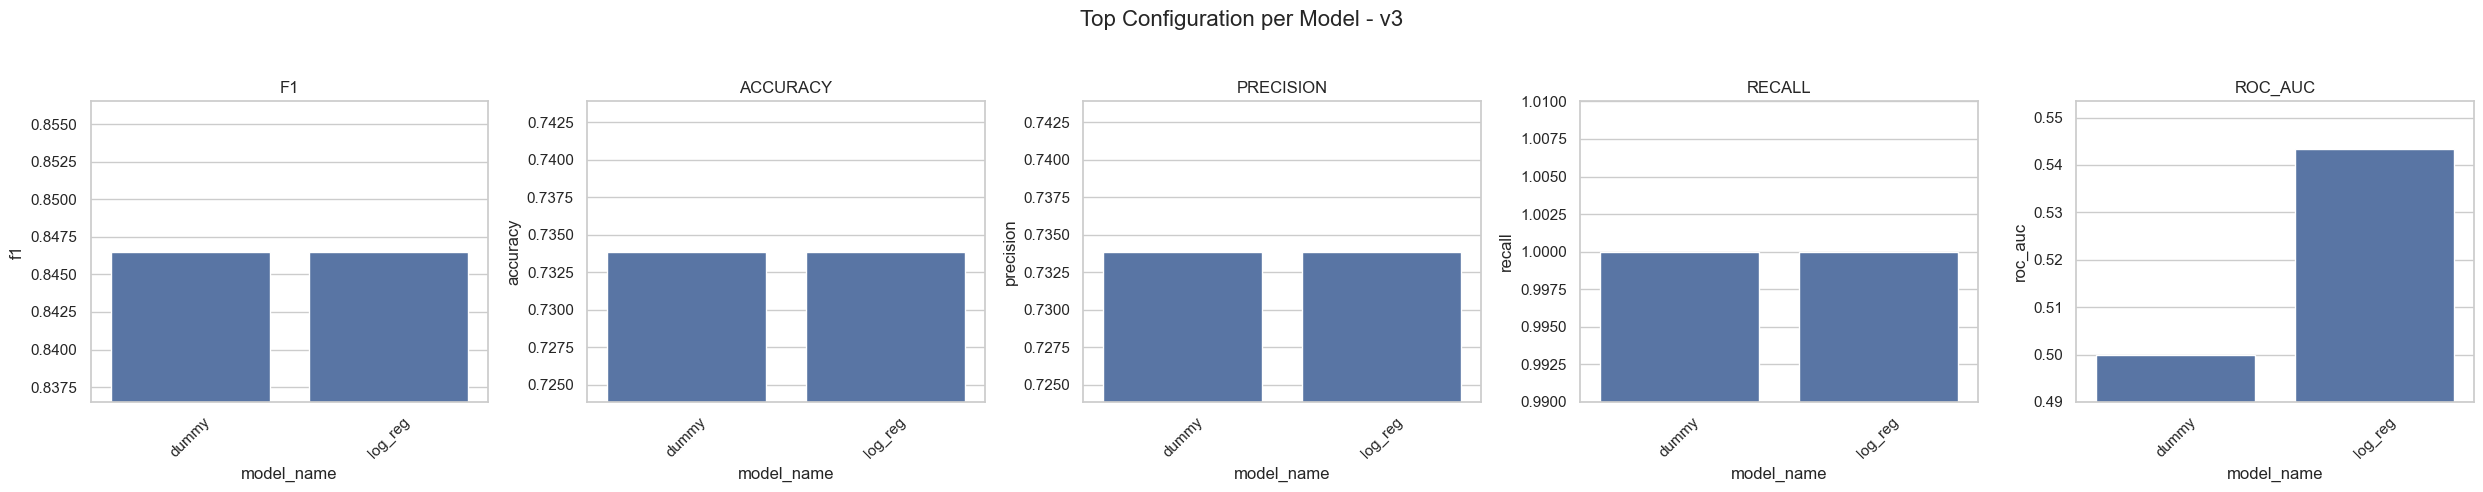

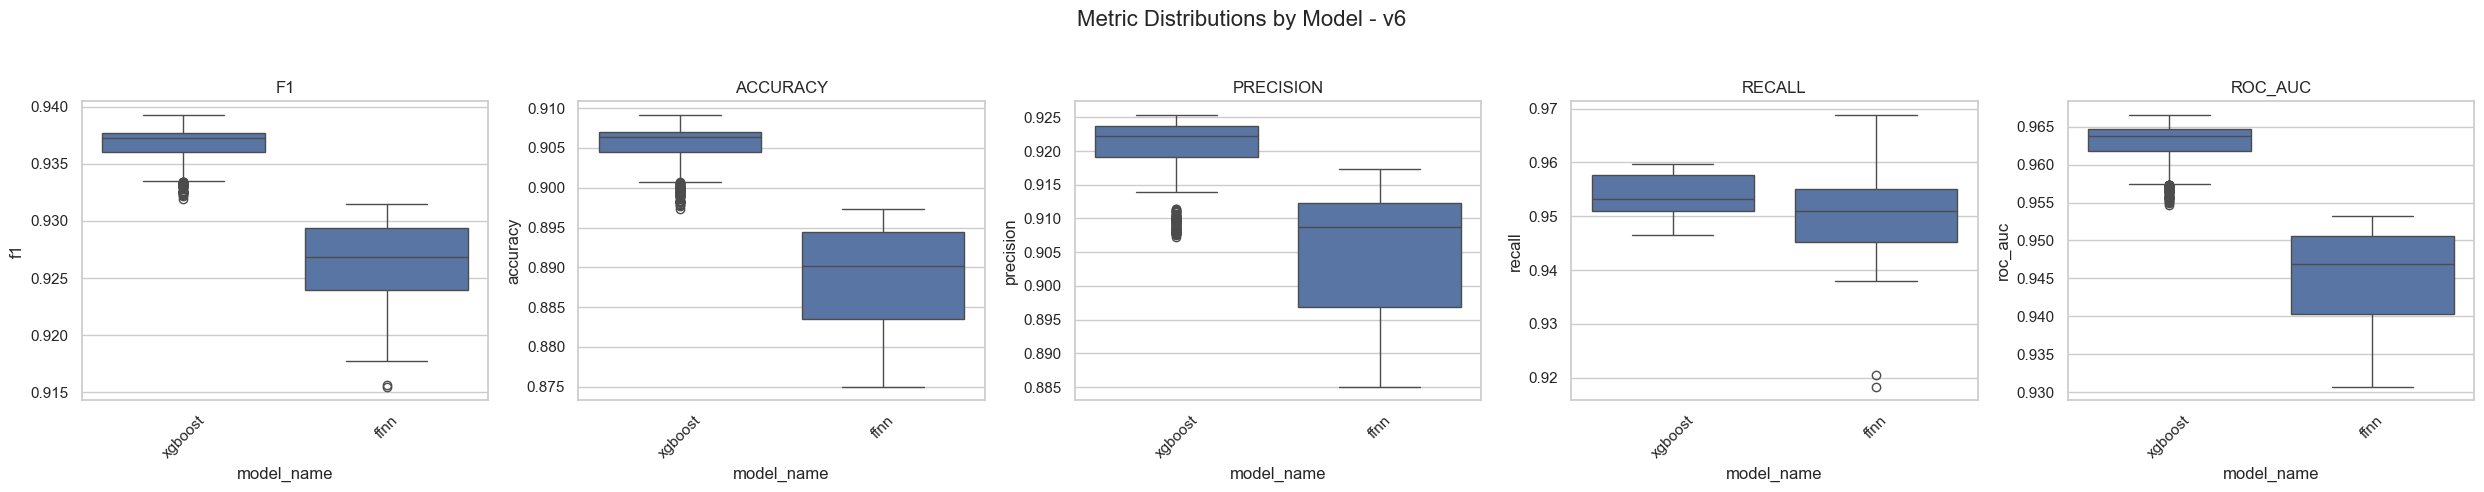

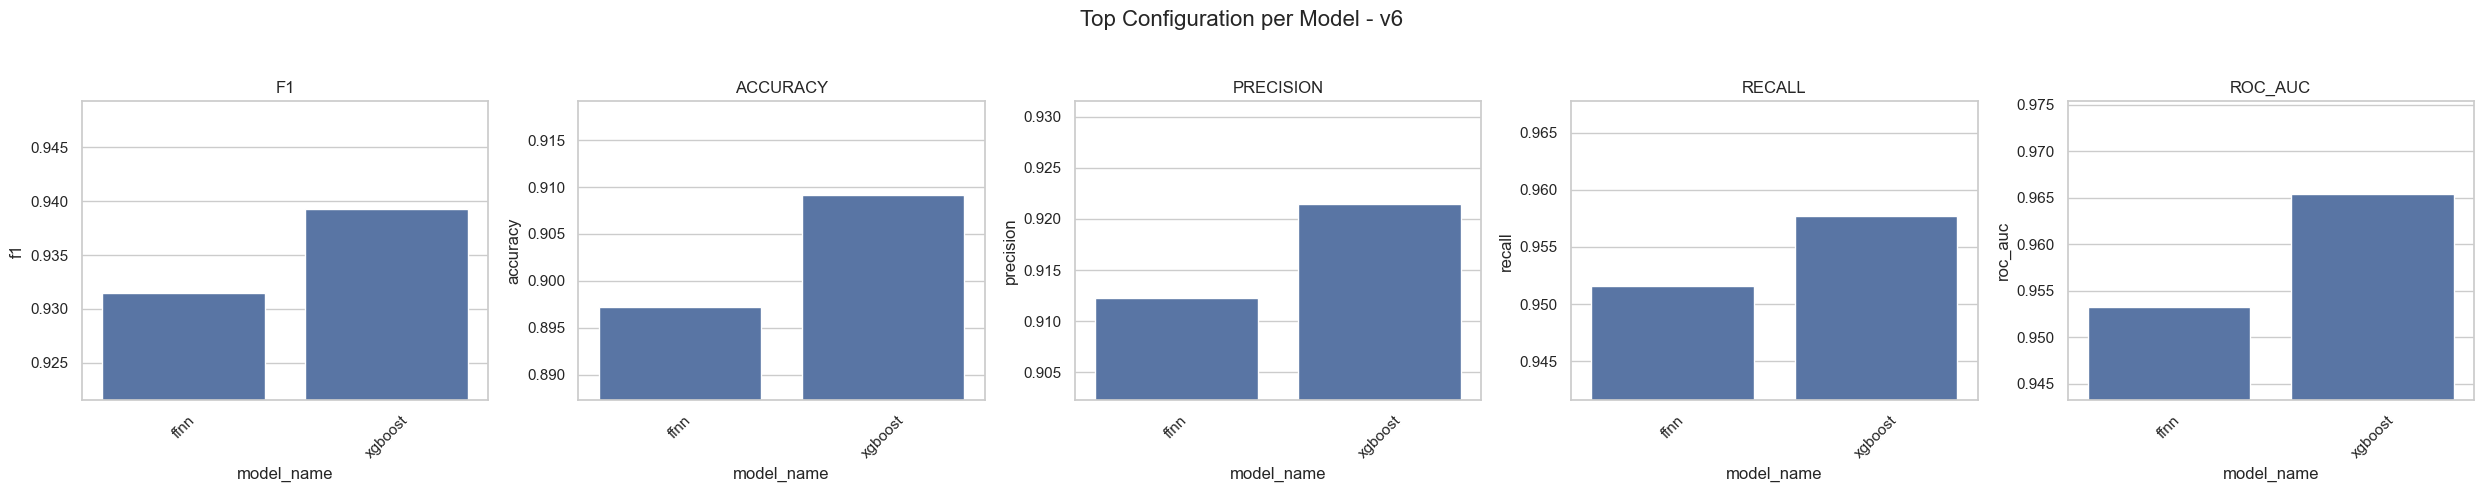

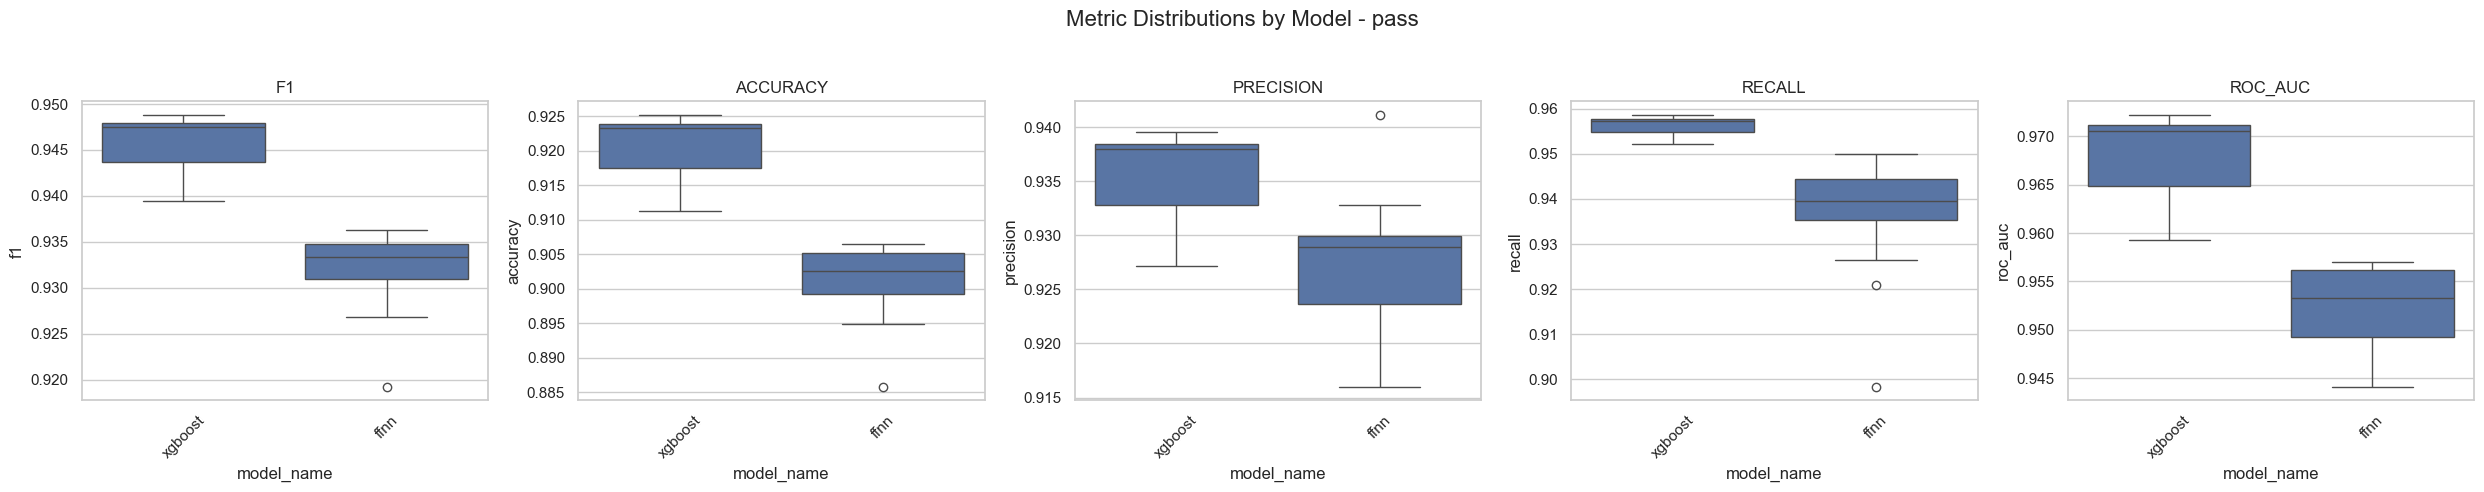

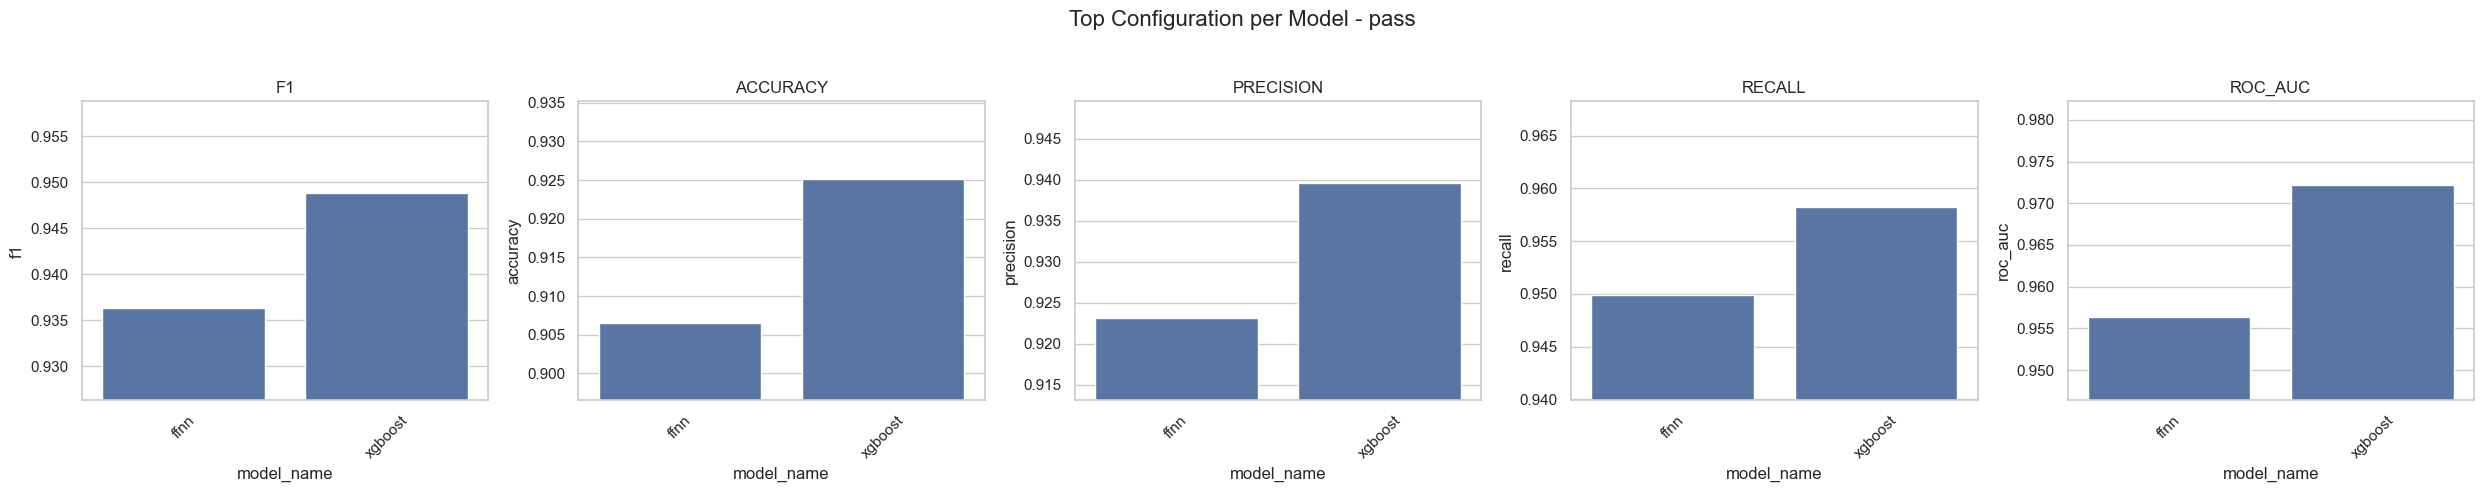

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df['dataset'] = df['model_id'].apply(lambda x: x.split('_')[0])

metrics = ['f1', 'accuracy', 'precision', 'recall', 'roc_auc']
datasets = df['dataset'].unique()
sns.set(style="whitegrid")

for dataset in datasets:
    df_subset = df[df['dataset'] == dataset]
    
    fig, axs = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    fig.suptitle(f"Metric Distributions by Model - {dataset}", fontsize=16)
    for i, metric in enumerate(metrics):
        sns.boxplot(data=df_subset, x='model_name', y=metric, ax=axs[i])
        axs[i].set_title(metric.upper())
        axs[i].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    top_per_model = (
        df_subset.sort_values(by=metrics, ascending=False)
        .groupby('model_name', as_index=False)
        .first()
    )

    fig, axs = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    fig.suptitle(f"Top Configuration per Model - {dataset}", fontsize=16)
    for i, metric in enumerate(metrics):
        sns.barplot(data=top_per_model, x='model_name', y=metric, ax=axs[i])
        axs[i].set_title(metric.upper())
        axs[i].tick_params(axis='x', rotation=45)

        vals = top_per_model[metric]
        ymin = vals.min() - 0.01
        ymax = vals.max() + 0.01
        axs[i].set_ylim(ymin, ymax)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

/var/folders/y7/rdkd1_7d3b9fjykc4g2vvjl00000gn/T/ipykernel_33709/862366851.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.92])


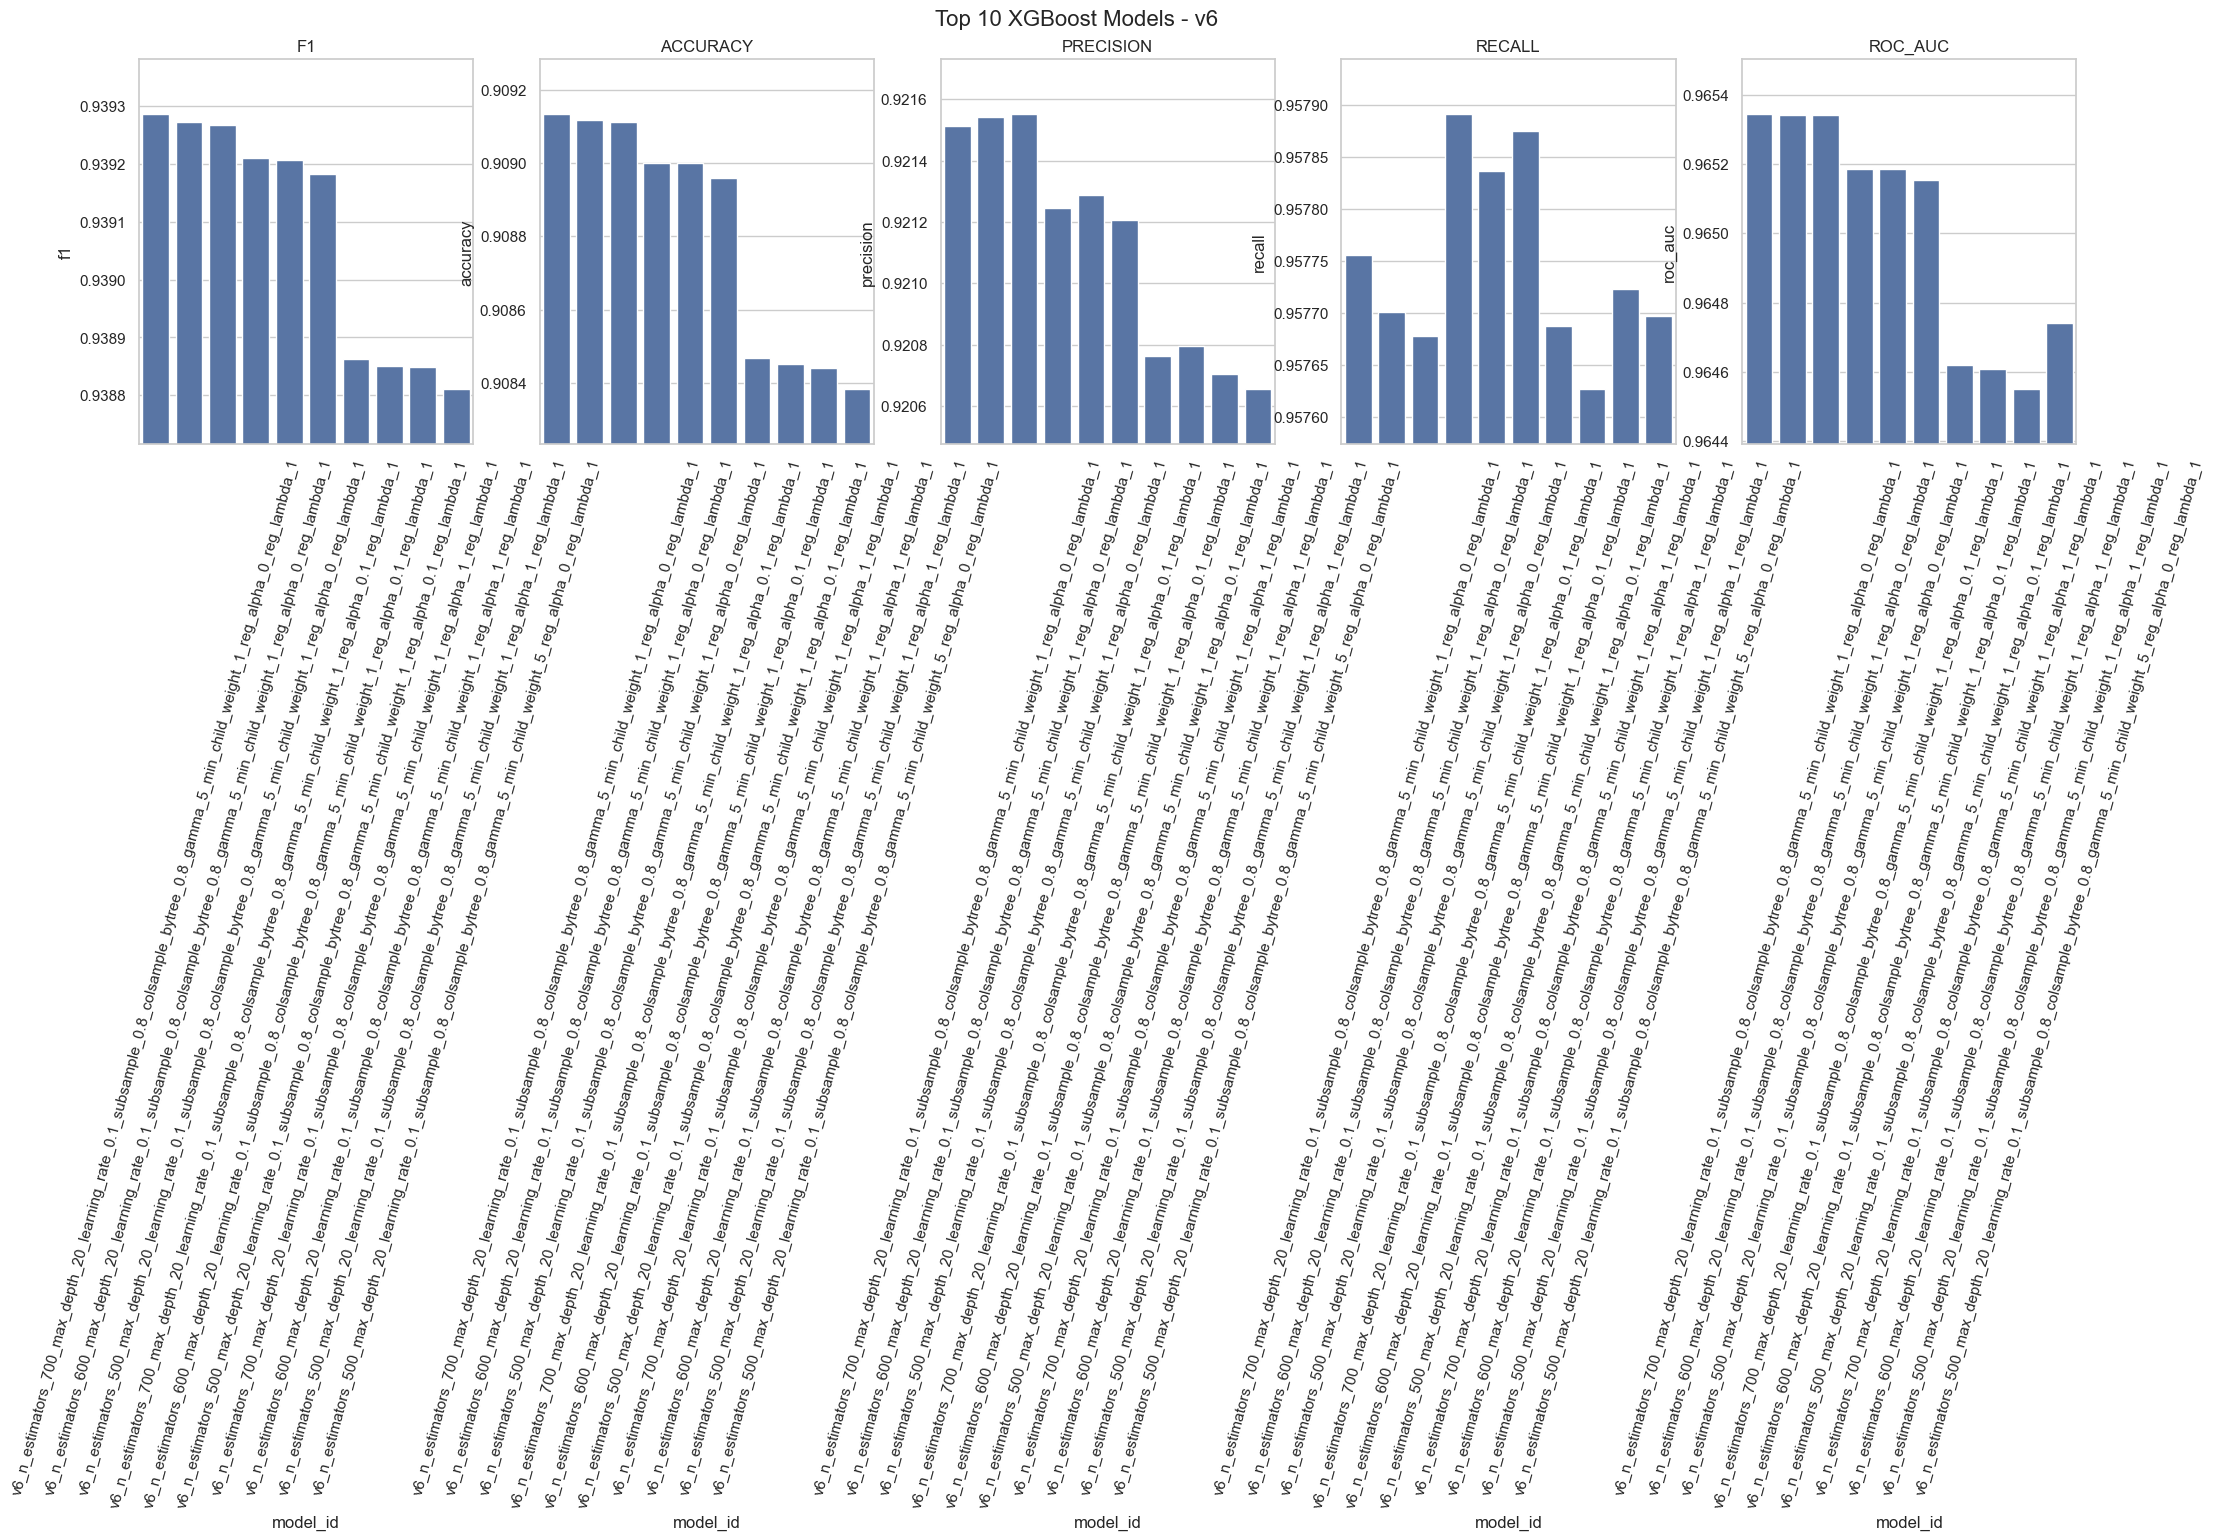

/var/folders/y7/rdkd1_7d3b9fjykc4g2vvjl00000gn/T/ipykernel_33709/862366851.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.92])


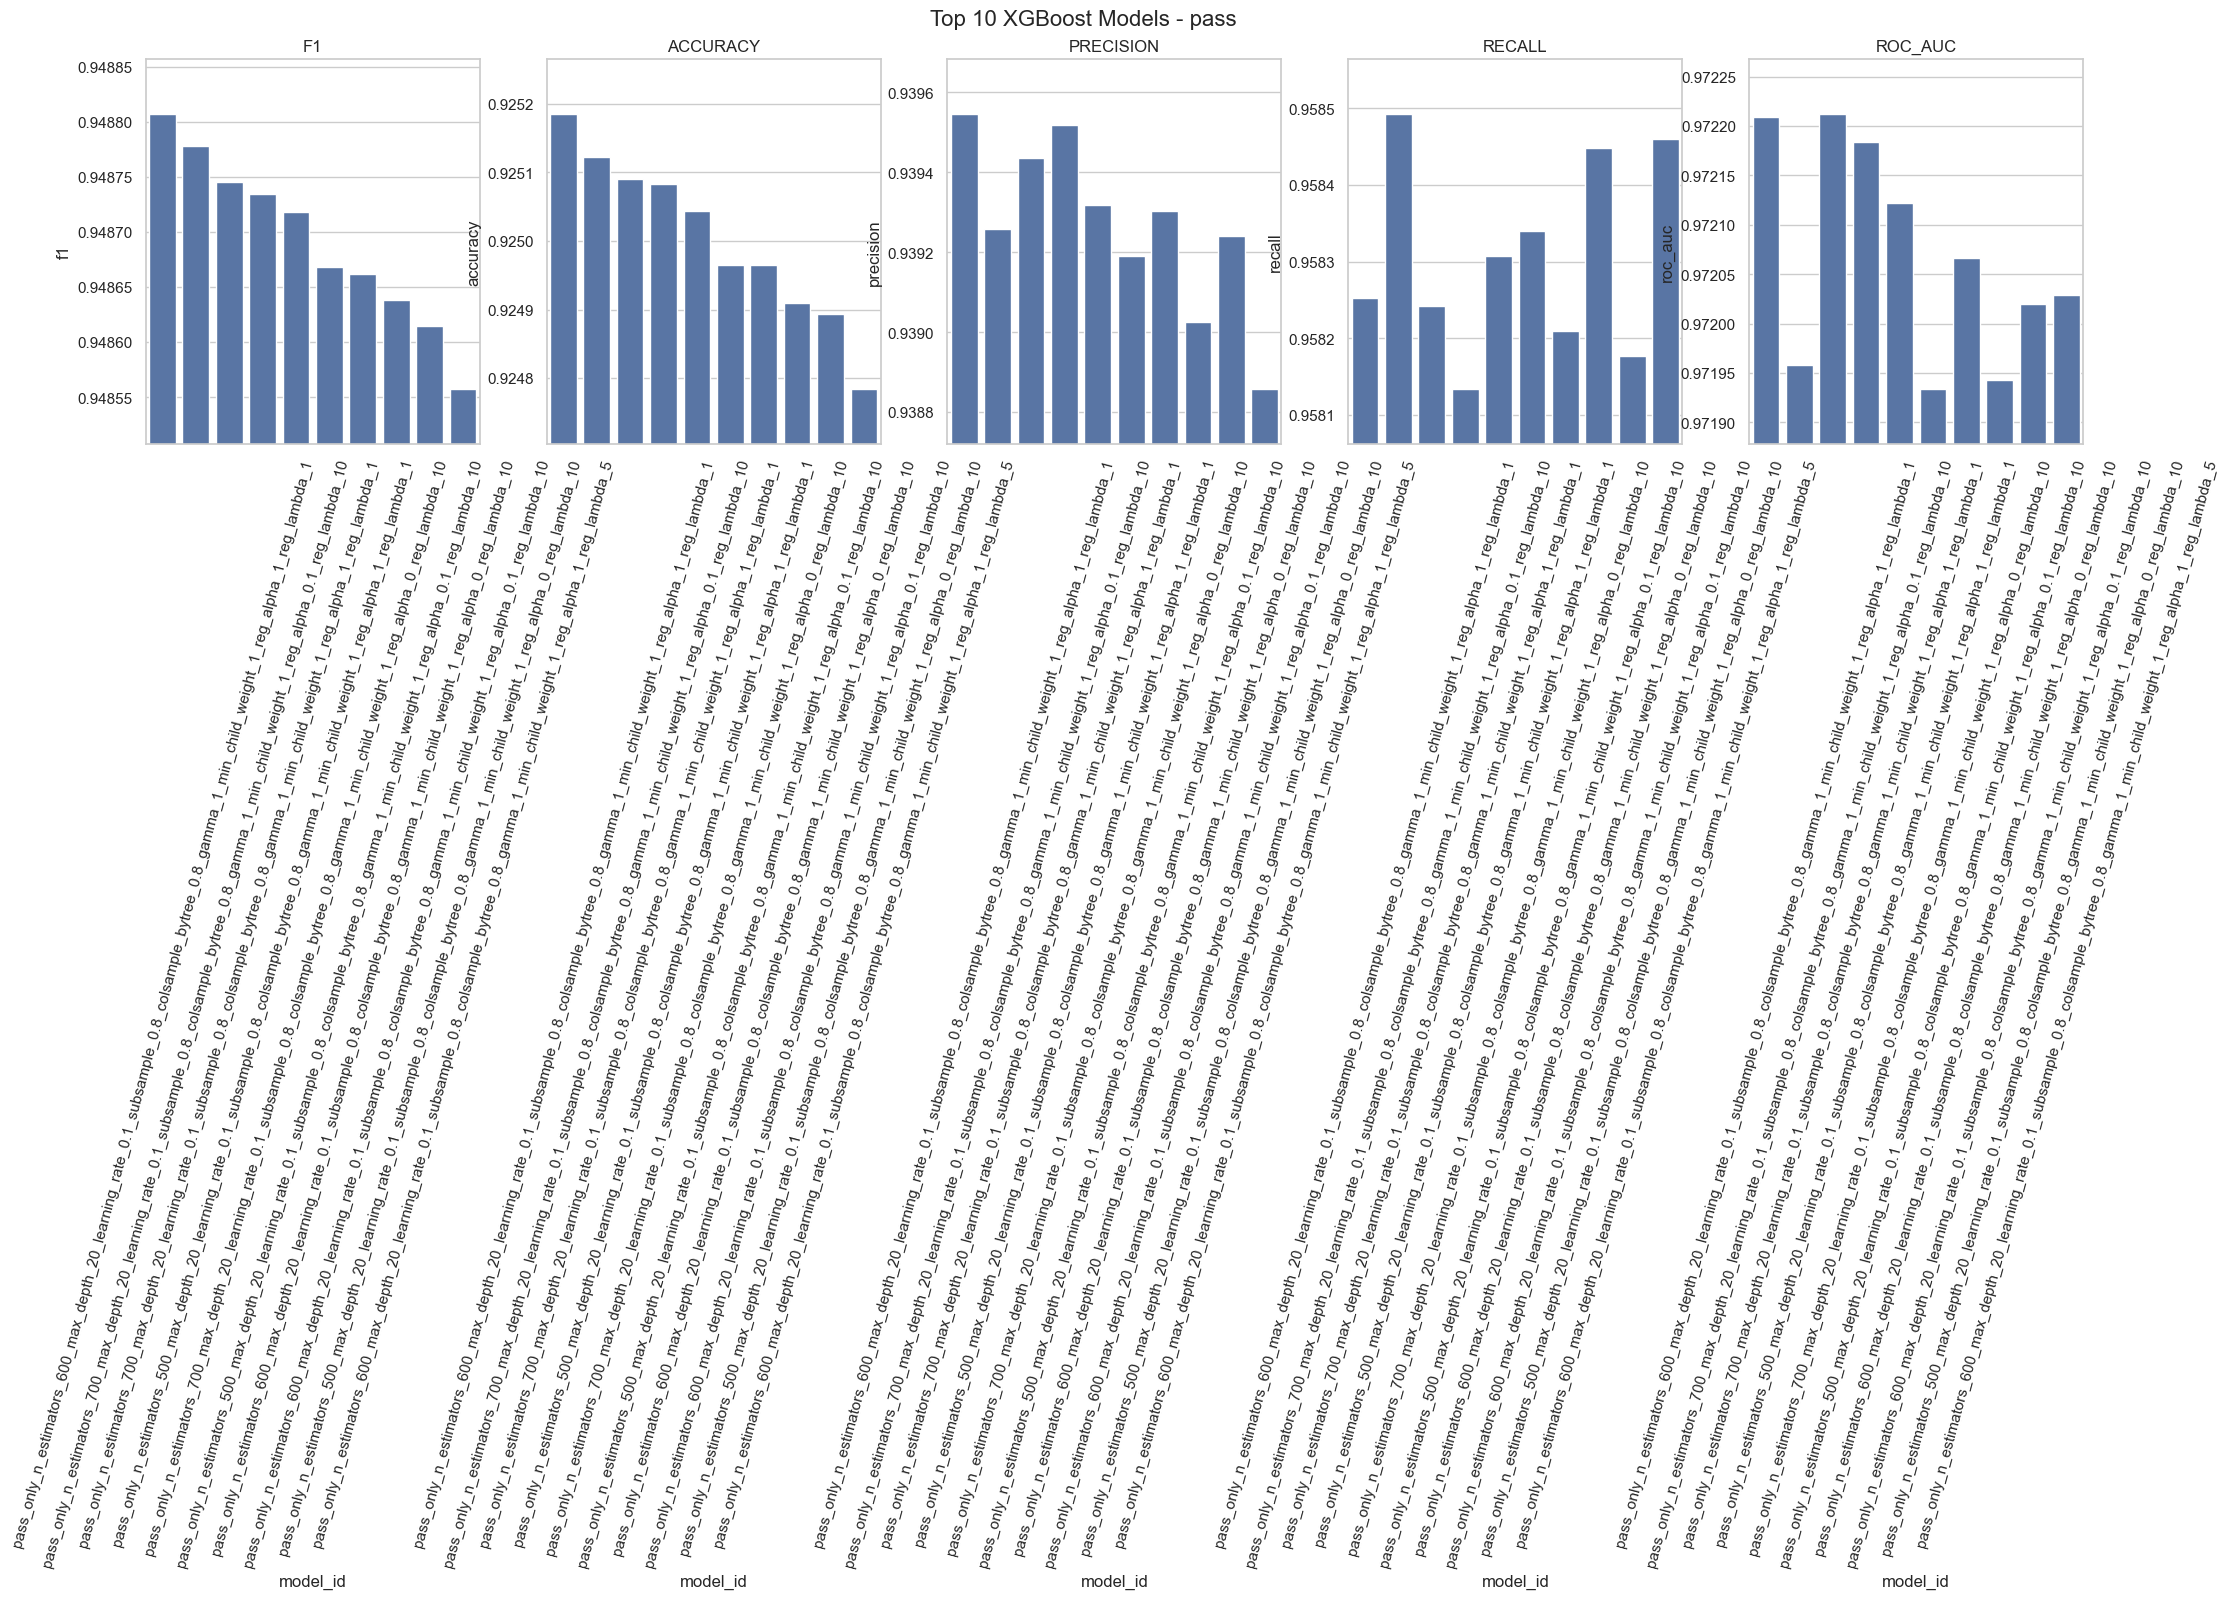

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['dataset'] = df['model_id'].apply(lambda x: x.split('_')[0])

xgb_df = df[df['model_name'].str.lower() == 'xgboost'].copy()

metrics = ['f1', 'accuracy', 'precision', 'recall', 'roc_auc']

def plot_grouped_xgb_top10(dataset_name):
    top10 = xgb_df[xgb_df['dataset'] == dataset_name].sort_values(by='f1', ascending=False).head(10)

    fig, axs = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5), sharex=False)
    fig.suptitle(f'Top 10 XGBoost Models - {dataset_name}', fontsize=16)

    for i, metric in enumerate(metrics):
        sns.barplot(data=top10, x='model_id', y=metric, ax=axs[i])
        axs[i].set_title(metric.upper())
        axs[i].tick_params(axis='x', rotation=75)
        
        # Scaled y-axis
        min_val = top10[metric].min()
        max_val = top10[metric].max()
        delta = max_val - min_val
        padding = delta * 0.2 if delta > 0 else 0.01
        axs[i].set_ylim(min_val - padding, max_val + padding)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

plot_grouped_xgb_top10("v6")
plot_grouped_xgb_top10("pass")

Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/dime_enriched_ds_11.parquet


/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:24:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



#### Test Set Performance for XGBoost V6 ####
accuracy: 0.9091
precision: 0.9215
recall: 0.9577
f1: 0.9392
roc_auc: 0.9657


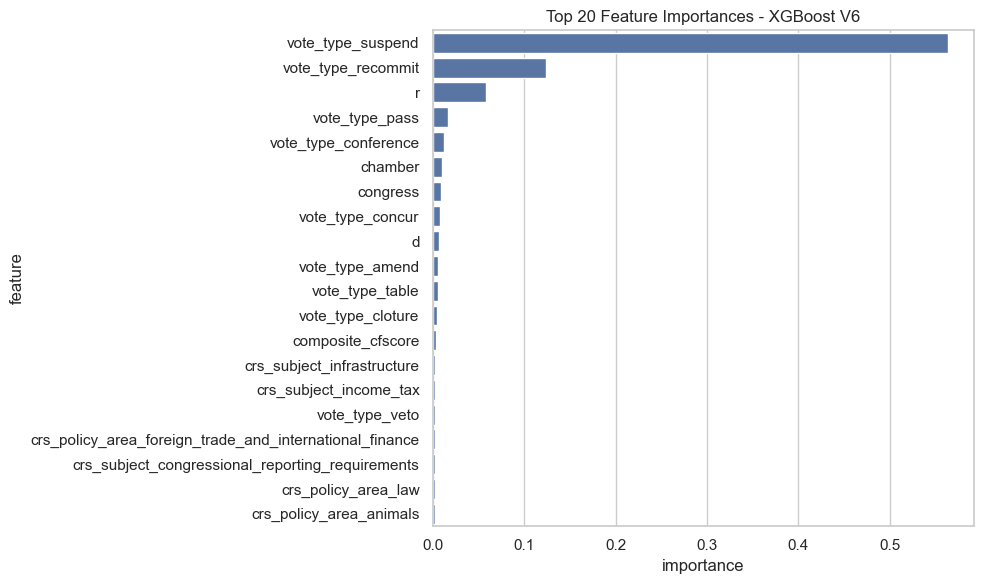

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:25:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



#### Test Set Performance for XGBoost Pass Only ####
accuracy: 0.9247
precision: 0.9388
recall: 0.9584
f1: 0.9485
roc_auc: 0.9723


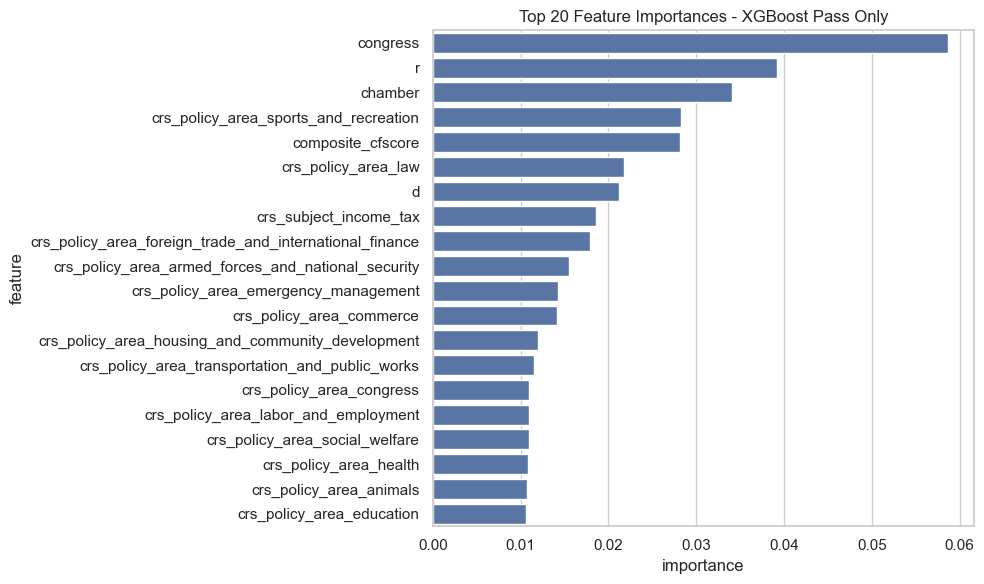

In [5]:


# Best hyperparameters
v6_params = {
    "n_estimators": 700, "max_depth": 20, "learning_rate": 0.1,
    "subsample": 0.8, "colsample_bytree": 0.8, "gamma": 5,
    "min_child_weight": 1, "reg_alpha": 0, "reg_lambda": 1, "n_jobs": -1
}

pass_params = {
    "n_estimators": 600, "max_depth": 20, "learning_rate": 0.1,
    "subsample": 0.8, "colsample_bytree": 0.8, "gamma": 1,
    "min_child_weight": 1, "reg_alpha": 1, "reg_lambda": 1, "n_jobs": -1
}

# Instantiate models
v6_model = XGBoostModel(dataset=Datasets.V6, kwargs_for_model=v6_params, verbose=True)
pass_model = XGBoostModel(dataset=Datasets.PASS_ONLY, kwargs_for_model=pass_params, verbose=True)

# Helper: plot feature importances
def plot_importance(model, feature_names, title, top_n=20):
    importances = model.feature_importances_
    feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feat_df = feat_df.sort_values(by='importance', ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df, x='importance', y='feature')
    plt.title(f'Top {top_n} Feature Importances - {title}')
    plt.tight_layout()
    plt.show()

# Helper: run model and evaluate on test set
def run_and_evaluate(model_obj: XGBoostModel, label: str):
    target, features, df = model_obj.dataset.get_dataset()
    train_df, val_df, test_df = split_data(
        df, target_col=target
    )

    model = model_obj.train(train_df[features], train_df[target])
    y_pred, y_prob = model_obj.predict(model, test_df[features])
    
    from src.models.evaluation import evaluate_predictions
    metrics = evaluate_predictions(test_df[target], y_pred, y_prob)
    print(f"\n#### Test Set Performance for {label} ####")
    for k, v in metrics.items():
        if k != "confusion_matrix":
            print(f"{k}: {v:.4f}")
    
    plot_importance(model, features, label)
    return metrics

# Run and evaluate both
v6_test_metrics = run_and_evaluate(v6_model, "XGBoost V6")
pass_test_metrics = run_and_evaluate(pass_model, "XGBoost Pass Only")